# Multi Target Regression

From: https://discuss.analyticsvidhya.com/t/how-to-predict-multiple-target-using-linear-regression/81158/11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [2]:
# Creating random data
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=400,
                                                    test_size=200,
                                                    random_state=4)

# Instantiating and fitting a RandomForestRegressor inside a MultiOutputRegressor?
multi_rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, 
                                                      max_depth=30, 
                                                      random_state=0))

multi_rf.fit(X_train, y_train)

# Instantiating and fitting a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,
                           max_depth=30,
                           random_state=2)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=2)

In [8]:
X_train.shape

(400, 1)

In [6]:
y_train.shape

(400, 2)

In [9]:
X_test.shape

(200, 1)

In [10]:
y_test.shape

(200, 2)

In [3]:
# Creating predictions
y_multirf = multi_rf.predict(X_test)
y_rf = rf.predict(X_test)

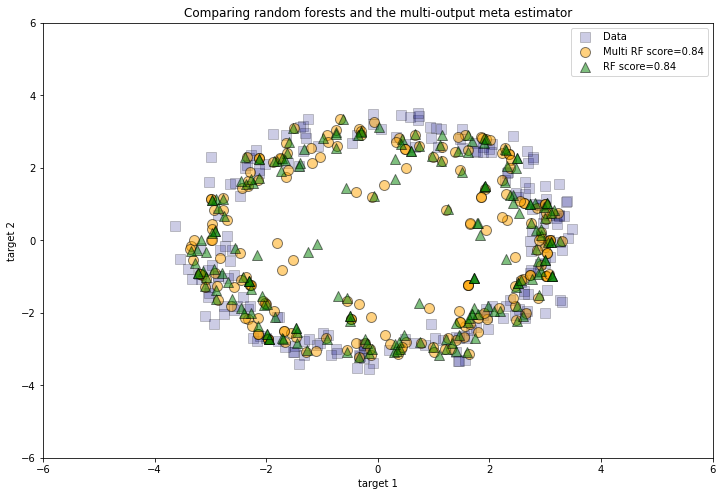

In [4]:
plt.figure(figsize=(12, 8))
s = 100

# Scatter plot of y_test data
plt.scatter(y_test[:, 0],
            y_test[:, 1],
            edgecolor='k',
            c='navy',
            s=s,
            marker='s',
            alpha=0.2,
            label='Data')

# Scatter plot of MultiOutputRegressor predictions
plt.scatter(y_multirf[:, 0],
            y_multirf[:, 1],
            edgecolor='k',
            c='orange',
            s=s,
            alpha=0.5,
            label='Multi RF score=%.2f' % multi_rf.score(X_test, y_test))

# Scatter plot of RandomForestRegressor predictions
plt.scatter(y_rf[:, 0],
            y_rf[:, 1],
            edgecolor='k',
            c='green',
            s=s,
            marker='^',
            alpha=0.5,
            label='RF score=%.2f' % rf.score(X_test, y_test))

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel('target 1')
plt.ylabel('target 2')
plt.title('Comparing random forests and the multi-output meta estimator')
plt.legend()
plt.show()